In [ ]:
!pip install factor_analyzer
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42623 sha256=510463788d5a7fa542530fe686d33f0c0f0b87b05ab157f651685482c8793afb
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import LabelEncoder
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
import scipy.stats as st

# Data load

In [4]:
banner = pd.read_excel('Копия banner.xlsx')
banner.head()

,user_id,funnel_stage,timestamp,profit,os
0,219687,interest,150000,NaN,Android
1,335514,interest,150000,NaN,Android
2,108759,interest,150000,NaN,Android
3,795063,interest,150000,NaN,Android
4,928373,interest,150000,NaN,iOS


In [ ]:
banner.shape

(576169, 5)

In [ ]:
native = pd.read_csv('Копия native.csv')
clean_native = native.drop(native.columns[0], axis=1)
clean_native.head()

,user_id,funnel_stage,timestamp,profit,os
0,991236,interest,150000,NaN,Android
1,622708,interest,150002,NaN,iOS
2,334823,interest,150003,NaN,Android
3,699175,consideration,150004,NaN,iOS
4,855631,interest,150010,NaN,iOS


In [ ]:
clean_native.shape

(117575, 5)

In [ ]:
organic_traffic = pd.read_csv('Копия organic_traffic.csv', header=None)
org_traffic = organic_traffic.drop(organic_traffic.columns[0], axis=1)
org_traffic.columns = ['user_id', 'funnel_stage',	'timestamp',	'profit',	'os']
org_traffic.head()

,user_id,funnel_stage,timestamp,profit,os
0,897013,interest,150000,NaN,Android
1,242700,interest,150000,NaN,Android
2,143856,interest,150000,NaN,Android
3,26717,consideration,150000,NaN,Android
4,286799,interest,150001,NaN,Android


In [ ]:
oth = pd.read_csv('Копия other.csv')
other = oth.drop(oth.columns[0], axis=1)
other.head()

,user_id,funnel_stage,timestamp,profit,os
0,619081,consideration,150013,NaN,iOS
1,900637,consideration,150013,NaN,iOS
2,551565,interest,150017,NaN,iOS
3,1037574,interest,150023,NaN,Android
4,1048472,interest,150047,NaN,Android


In [ ]:
part_net = pd.read_csv('Копия partner_network.csv')
partner_network = part_net.drop(part_net.columns[0], axis=1)
partner_network.columns = ['user_id', 'funnel_stage',	'timestamp',	'profit',	'os']
partner_network.head()

,user_id,funnel_stage,timestamp,profit,os
0,817640,interest,150003,NaN,Android
1,890248,purchase,150003,2136.0,Android
2,1050415,interest,150004,NaN,Android
3,586829,interest,150004,NaN,iOS
4,1011102,interest,150005,NaN,Android


In [ ]:
rich = pd.read_excel('Копия rich.xlsx')
rich.head()

,user_id,funnel_stage,timestamp,profit,os
0,263061,INTEREST,150020,NaN,iOS
1,803654,CONSIDERATION,150041,NaN,iOS
2,320634,INTEREST,150042,NaN,iOS
3,654929,CONSIDERATION,150042,NaN,iOS
4,401613,INTEREST,150045,NaN,iOS


In [ ]:
s = pd.read_csv('Копия search.csv')
search = s.drop(s.columns[0], axis=1)
search.columns = ['user_id', 'funnel_stage',	'timestamp',	'profit',	'os']
search.head()

,user_id,funnel_stage,timestamp,profit,os
0,387356,INTEREST,150000,NaN,iOS
1,619571,CONSIDERATION,150000,NaN,iOS
2,230119,INTEREST,150000,NaN,iOS
3,399556,INTEREST,150000,NaN,iOS
4,556959,INTEREST,150001,NaN,Android


In [ ]:
v = pd.read_csv('Копия video.csv')
video = v.drop(v.columns[0], axis=1)
video.columns = ['user_id', 'funnel_stage',	'timestamp',	'profit',	'os']
video.head()

,user_id,funnel_stage,timestamp,profit,os
0,111649,consideration,150000,NaN,Android
1,793204,consideration,150000,NaN,Android
2,107750,interest,150001,NaN,Android
3,438176,interest,150001,NaN,Android
4,515596,consideration,150003,NaN,Android


In [ ]:
advertising_information = pd.read_json('Копия advertising_information.json')
advertising_information

,ad_channel,price
0,search,1.50
1,banner,0.50
2,video,0.75
3,native,2.00
4,partner_network,1.00
5,rich,2.50
6,organic_traffic,0.00
7,other,NaN


# Data combined

In [ ]:
video_pr = advertising_information.iloc[2]
search_pr = advertising_information.iloc[0]
banner_pr = advertising_information.iloc[1]
native_pr = advertising_information.iloc[3]
partner_network_pr = advertising_information.iloc[4]
rich_pr = advertising_information.iloc[5]
organic_traffic_pr= advertising_information.iloc[6]
other_pr = advertising_information.iloc[7]

In [ ]:
video['ad_channel'] = video_pr.iloc[0]
video['price'] = video_pr.iloc[1]
video.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,111649,consideration,150000,NaN,Android,video,0.75
1,793204,consideration,150000,NaN,Android,video,0.75
2,107750,interest,150001,NaN,Android,video,0.75
3,438176,interest,150001,NaN,Android,video,0.75
4,515596,consideration,150003,NaN,Android,video,0.75


In [ ]:
banner['ad_channel'] = banner_pr.iloc[0]
banner['price'] = banner_pr.iloc[1]
banner.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,219687,interest,150000,NaN,Android,banner,0.5
1,335514,interest,150000,NaN,Android,banner,0.5
2,108759,interest,150000,NaN,Android,banner,0.5
3,795063,interest,150000,NaN,Android,banner,0.5
4,928373,interest,150000,NaN,iOS,banner,0.5


In [ ]:
search['ad_channel'] = search_pr.iloc[0]
search['price'] = search_pr.iloc[1]
search.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,387356,INTEREST,150000,NaN,iOS,search,1.5
1,619571,CONSIDERATION,150000,NaN,iOS,search,1.5
2,230119,INTEREST,150000,NaN,iOS,search,1.5
3,399556,INTEREST,150000,NaN,iOS,search,1.5
4,556959,INTEREST,150001,NaN,Android,search,1.5


In [ ]:
clean_native['ad_channel'] = native_pr.iloc[0]
clean_native['price'] = native_pr.iloc[1]
clean_native.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,991236,interest,150000,NaN,Android,native,2.0
1,622708,interest,150002,NaN,iOS,native,2.0
2,334823,interest,150003,NaN,Android,native,2.0
3,699175,consideration,150004,NaN,iOS,native,2.0
4,855631,interest,150010,NaN,iOS,native,2.0


In [ ]:
partner_network['ad_channel'] = partner_network_pr.iloc[0]
partner_network['price'] = partner_network_pr.iloc[1]
partner_network.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,817640,interest,150003,NaN,Android,partner_network,1.0
1,890248,purchase,150003,2136.0,Android,partner_network,1.0
2,1050415,interest,150004,NaN,Android,partner_network,1.0
3,586829,interest,150004,NaN,iOS,partner_network,1.0
4,1011102,interest,150005,NaN,Android,partner_network,1.0


In [ ]:
rich['ad_channel'] = rich_pr.iloc[0]
rich['price'] = rich_pr.iloc[1]
rich.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,263061,INTEREST,150020,NaN,iOS,rich,2.5
1,803654,CONSIDERATION,150041,NaN,iOS,rich,2.5
2,320634,INTEREST,150042,NaN,iOS,rich,2.5
3,654929,CONSIDERATION,150042,NaN,iOS,rich,2.5
4,401613,INTEREST,150045,NaN,iOS,rich,2.5


In [ ]:
org_traffic['ad_channel'] = organic_traffic_pr.iloc[0]
org_traffic['price'] = organic_traffic_pr.iloc[1]
org_traffic.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,897013,interest,150000,NaN,Android,organic_traffic,0.0
1,242700,interest,150000,NaN,Android,organic_traffic,0.0
2,143856,interest,150000,NaN,Android,organic_traffic,0.0
3,26717,consideration,150000,NaN,Android,organic_traffic,0.0
4,286799,interest,150001,NaN,Android,organic_traffic,0.0


In [ ]:
other['ad_channel'] = other_pr.iloc[0]
other['price'] = other_pr.iloc[1]
other.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,619081,consideration,150013,NaN,iOS,other,NaN
1,900637,consideration,150013,NaN,iOS,other,NaN
2,551565,interest,150017,NaN,iOS,other,NaN
3,1037574,interest,150023,NaN,Android,other,NaN
4,1048472,interest,150047,NaN,Android,other,NaN


In [ ]:
all_channels = [banner, video, clean_native, partner_network, rich, search, org_traffic]
all_channels

[        user_id   funnel_stage  timestamp  profit       os ad_channel  price
 0        219687       interest     150000     NaN  Android     banner    0.5
 1        335514       interest     150000     NaN  Android     banner    0.5
 2        108759       interest     150000     NaN  Android     banner    0.5
 3        795063       interest     150000     NaN  Android     banner    0.5
 4        928373       interest     150000     NaN      iOS     banner    0.5
 ...         ...            ...        ...     ...      ...        ...    ...
 576164   591027         intent     218761     NaN  Android     banner    0.5
 576165   452032       purchase     219803   260.0  Android     banner    0.5
 576166  1009191         intent     220227     NaN  Android     banner    0.5
 576167   861271  consideration     221756     NaN      iOS     banner    0.5
 576168   799641  consideration     223039     NaN  Android     banner    0.5
 
 [576169 rows x 7 columns],
         user_id   funnel_stage  t

In [ ]:
combined = pd.concat(all_channels, ignore_index=True)
combined_channels = combined.sort_values('timestamp')
combined_channels.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,219687,interest,150000,NaN,Android,banner,0.5
1231237,991236,interest,150000,NaN,Android,native,2.0
1800329,387356,INTEREST,150000,NaN,iOS,search,1.5
1800330,619571,CONSIDERATION,150000,NaN,iOS,search,1.5
1800331,230119,INTEREST,150000,NaN,iOS,search,1.5


In [ ]:
combined_channels.to_csv('combined_channels.csv', index=False)

# Data preprocessing

In [ ]:
df = pd.read_csv('combined_channels.csv')

In [ ]:
df.head()

## 1stage

Данные поступили вам напрямую от заказчика. В них могут быть пропуски и ошибки в названиях элементов колонок. Найти и исправить все некорректные строки.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823118 entries, 0 to 3823117
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_id       int64  
 1   funnel_stage  object 
 2   timestamp     int64  
 3   profit        float64
 4   os            object 
 5   ad_channel    object 
 6   price         float64
dtypes: float64(2), int64(2), object(3)
memory usage: 204.2+ MB


In [ ]:
df.nunique()

user_id         529359
funnel_stage         8
timestamp        60724
profit               6
os                   2
ad_channel           7
price                7
dtype: int64

In [ ]:
df.funnel_stage.value_counts()

funnel_stage
interest         1950344
INTEREST         1250609
consideration     199331
INTENT            162610
CONSIDERATION     138962
intent            116428
PURCHASE            3112
purchase            1722
Name: count, dtype: int64

Этапы воронки вводились и заглавными и незаглавными буквами поэтому они повторяются. Предлагаю поменять все на нижний регистр, чтобы количество соединились.

In [ ]:
1950344+1250609

3200953

In [ ]:
df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
df.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,219687,interest,150000,NaN,android,banner,0.5
1,991236,interest,150000,NaN,android,native,2.0
2,387356,interest,150000,NaN,ios,search,1.5
3,619571,consideration,150000,NaN,ios,search,1.5
4,230119,interest,150000,NaN,ios,search,1.5


In [ ]:
df.funnel_stage.value_counts()

funnel_stage
interest         3200953
consideration     338293
intent            279038
purchase            4834
Name: count, dtype: int64

In [ ]:
df.profit.value_counts()

profit
1099.0    859
260.0     849
520.0     841
2136.0    826
130.0     733
50.0      726
Name: count, dtype: int64

In [ ]:
df.profit.unique()

array([  nan, 2136.,  520., 1099.,  260.,   50.,  130.])

In [ ]:
df.user_id.value_counts()

user_id
882758    3355
877835    3313
692503    3309
50025     3309
855603    3262
          ... 
495885       1
430083       1
279696       1
169869       1
219687       1
Name: count, Length: 529359, dtype: int64

In [ ]:
df.timestamp.value_counts()

timestamp
174734    1735
188033    1704
173384    1694
186845    1694
173866    1681
          ... 
209045       1
209047       1
209050       1
209051       1
225688       1
Name: count, Length: 60724, dtype: int64

In [ ]:
df.ad_channel.value_counts()

ad_channel
search             1491205
video               655068
banner              576169
organic_traffic     531584
partner_network     387429
native              117575
rich                 64088
Name: count, dtype: int64

In [ ]:
df.os.value_counts()

os
android    2018587
ios        1804531
Name: count, dtype: int64

In [ ]:
df.price.value_counts()

price
1.50    1491205
0.75     655068
0.50     576169
0.00     531584
1.00     387429
2.00     117575
2.50      64088
Name: count, dtype: int64

In [ ]:
# Количество пропусков в каждом столбце
missing_per_column = df.isnull().sum()
print(missing_per_column)

user_id               0
funnel_stage          0
timestamp             0
profit          3818284
os                    0
ad_channel            0
price                 0
dtype: int64


In [ ]:
df[df['profit'].isna()].funnel_stage.value_counts()

funnel_stage
interest         3200953
consideration     338293
intent            279038
Name: count, dtype: int64

В данных этапах воронки заполнила пустые значения значением 0, так как это прибыль, а в этих этапах прибыли не было.

In [ ]:
# заполнение пропусков в столбце profit значением 0
df['profit'] = df['profit'].fillna(0)

In [ ]:
df[df['profit'].isna()].funnel_stage.value_counts()

Series([], Name: count, dtype: int64)

array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'timestamp'}>],
       [<Axes: title={'center': 'profit'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

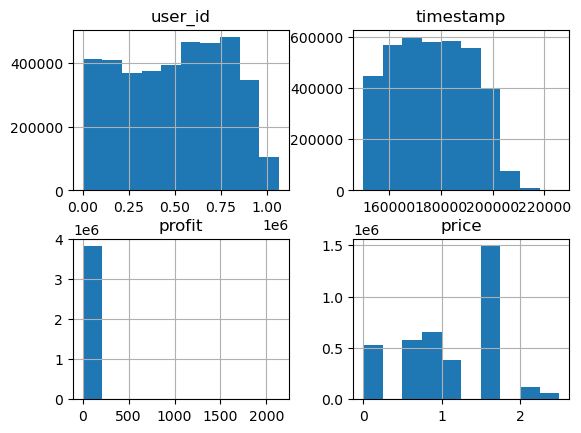

In [ ]:
df.hist()

Данные очищены проверены.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823118 entries, 0 to 3823117
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_id       int64  
 1   funnel_stage  object 
 2   timestamp     int64  
 3   profit        float64
 4   os            object 
 5   ad_channel    object 
 6   price         float64
dtypes: float64(2), int64(2), object(3)
memory usage: 204.2+ MB


In [ ]:
df[df.duplicated].count()

user_id         2831380
funnel_stage    2831380
timestamp       2831380
profit          2831380
os              2831380
ad_channel      2831380
price           2831380
dtype: int64

примерно 3млн записей повторяются, что странно.

In [ ]:
# Добавляем порядок полю воронка продаж
funnel_order = ['interest', 'consideration', 'intent', 'purchase']
df['funnel_stage'] = pd.Categorical(df['funnel_stage'], categories=funnel_order, ordered=True)

In [ ]:
df.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,219687,interest,150000,0.0,android,banner,0.5
1,991236,interest,150000,0.0,android,native,2.0
2,387356,interest,150000,0.0,ios,search,1.5
3,619571,consideration,150000,0.0,ios,search,1.5
4,230119,interest,150000,0.0,ios,search,1.5


In [ ]:
df.to_csv('data_cleaned.csv', index=False)

In [ ]:
df=pd.read_csv('data_cleaned.csv')
df.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,219687,interest,150000,0.0,android,banner,0.5
1,991236,interest,150000,0.0,android,native,2.0
2,387356,interest,150000,0.0,ios,search,1.5
3,619571,consideration,150000,0.0,ios,search,1.5
4,230119,interest,150000,0.0,ios,search,1.5


## 2 stage

Посчитать сколько уникальных пользователей пришло по каждому рекламному каналу в разрезе этапов воронки продаж. Посмотреть на результаты и подумать, не кажутся ли они странными. Не забывать о последовательности этапов и логике в воронке продаж.

In [ ]:
df.drop(columns=['timestamp', 'profit', 'os','price']).groupby(['ad_channel', 'funnel_stage']).count()


/var/folders/kp/jvn57tmj1mg0t9wvcb6pg__00000gn/T/ipykernel_86955/3807937983.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.drop(columns=['timestamp', 'profit', 'os','price']).groupby(['ad_channel', 'funnel_stage']).count()


user_id
ad_channel      funnel_stage          
banner          interest        487948
                consideration    47541
                intent           39992
                purchase           688
native          interest        102953
                consideration    12597
                intent            1988
                purchase            37
organic_traffic interest        431003
                consideration    53592
                intent           46447
                purchase           542
partner_network interest        334836
                consideration    24721
                intent           27422
                purchase           450
rich            interest         54440
                consideration     4657
                intent            4969
                purchase            22
search          interest       1196169
                consideration   134305
                intent          157641
                purchase          3090
video           interest        593604
                consideration    60880
                intent             579
                purchase             5

Если просмотривать все этапы воронки продаж в рекламных кампаниях, то странными данными здесь являются данные из рекламных каналов rich, search, partner_network. У них количество пользователей на этапе consideration меньше чем на этапе intent, что является не корректным.

У других рекламных каналов количество пользователей логическо распределено нормально.

## 3Stage

In [ ]:
# Группируем по user_id и timestamp и подсчитываем количество действий
multiple_actions = df.groupby(['user_id', 'timestamp']).size().reset_index(name='action_count')

# Фильтруем только те записи, где количество действий больше 1
multiple_actions = multiple_actions[multiple_actions['action_count'] > 1]
print(multiple_actions)


        user_id  timestamp  action_count
526         580     164474           544
528         580     177644           505
618         703     152894           567
971        1099     177536           543
1057       1187     187840           582
...         ...        ...           ...
843841   919949     157062           501
843870   919978     186579           594
843940   920046     188433           532
844418   920552     173209           589
844568   920699     164172           573

[5175 rows x 3 columns]


In [ ]:
grouped = df.groupby(['ad_channel', 'funnel_stage', 'user_id', 'timestamp'], observed=True).size().reset_index(name='action_count')
bots = grouped[grouped_df['action_count'] > 1]
bots.head()

,ad_channel,funnel_stage,user_id,timestamp,action_count
47686,banner,intent,28452,195563,504
47712,banner,intent,33243,192079,588
47802,banner,intent,50025,178519,581
47854,banner,intent,58027,184097,509
48086,banner,intent,107722,190476,554


In [ ]:
bots.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5171 entries, 47686 to 981106
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ad_channel    5171 non-null   object
 1   funnel_stage  5171 non-null   object
 2   user_id       5171 non-null   int64 
 3   timestamp     5171 non-null   int64 
 4   action_count  5171 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 242.4+ KB


In [ ]:
bots.user_id.value_counts()

user_id
50025     6
882758    6
877835    6
855603    6
692503    6
         ..
862893    1
868282    1
868554    1
869426    1
911078    1
Name: count, Length: 4319, dtype: int64

Здесь видно что один пользователь в одно время выполнял больше 500 действии, что означает действия были выполнены ботами.

/var/folders/kp/jvn57tmj1mg0t9wvcb6pg__00000gn/T/ipykernel_84715/2181480822.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.timestamp.values)


<Axes: ylabel='Density'>

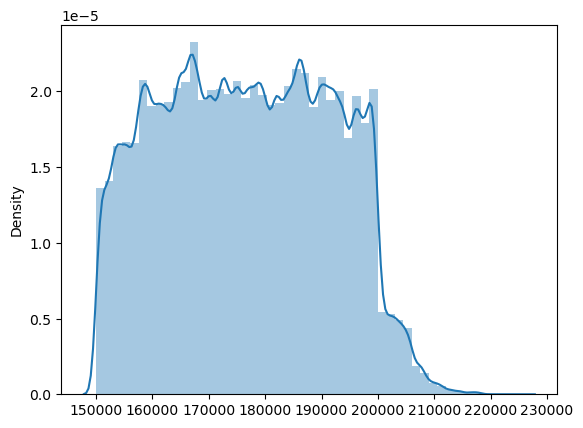

In [ ]:
sns.distplot(df.timestamp.values)

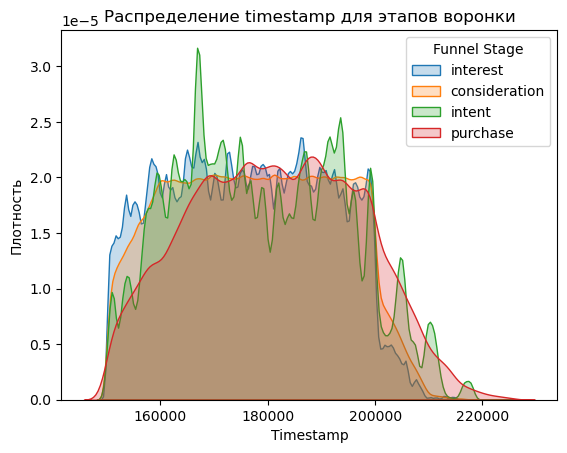

In [ ]:
sns.kdeplot(df[df.funnel_stage == 'interest'].timestamp.values, label='interest', fill=True, bw_adjust=0.5)
sns.kdeplot(df[df.funnel_stage == 'consideration'].timestamp.values, label='consideration', fill=True, bw_adjust=0.5)
sns.kdeplot(df[df.funnel_stage == 'intent'].timestamp.values, label='intent', fill=True, bw_adjust=0.5)
sns.kdeplot(df[df.funnel_stage == 'purchase'].timestamp.values, label='purchase', fill=True, bw_adjust=0.5)

plt.title('Распределение timestamp для этапов воронки')
plt.xlabel('Timestamp')
plt.ylabel('Плотность')
plt.legend(title='Funnel Stage')
plt.show()


Если смотреть на распределение времени действия пользователя по воронкам то можно заметить что все этапы воронки продаж имеют бимодальность. Для детального анализа я с помощью графиков хочу сравнить время действии пользователя по парна этапам продаж.

In [ ]:
# Получаем уникальные user_id из bots
fraud_user_ids = set(bots['user_id'])

# Создаем датафрейм с фродовыми записями
fraud_df = df[df['user_id'].isin(fraud_user_ids)]

# Удаляем фродовые записи из основного датафрейма
clean_df = df[~df['user_id'].isin(fraud_user_ids)]

# Проверяем размеры новых датафреймов
print("Фродовые записи:", fraud_df.shape)
print("Очищенный датафрейм:", clean_df.shape)


Фродовые записи: (2846893, 7)
Очищенный датафрейм: (976225, 7)


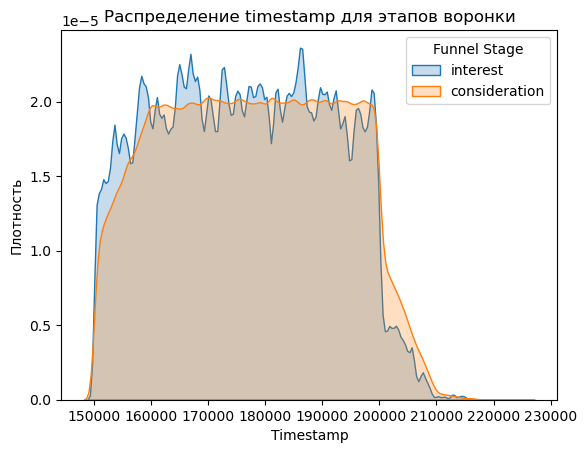

In [ ]:
sns.kdeplot(df[df.funnel_stage == 'interest'].timestamp.values, label='interest', fill=True, bw_adjust=0.5)
sns.kdeplot(df[df.funnel_stage == 'consideration'].timestamp.values, label='consideration', fill=True, bw_adjust=0.5)

plt.title('Распределение timestamp для этапов воронки')
plt.xlabel('Timestamp')
plt.ylabel('Плотность')
plt.legend(title='Funnel Stage')
plt.show()


распределение этапа interest очень бимодальное, также есть места где количество действии этапа interest превышает этап consideration. Это может означать что были использованы боты накликиванием в этапе consideration

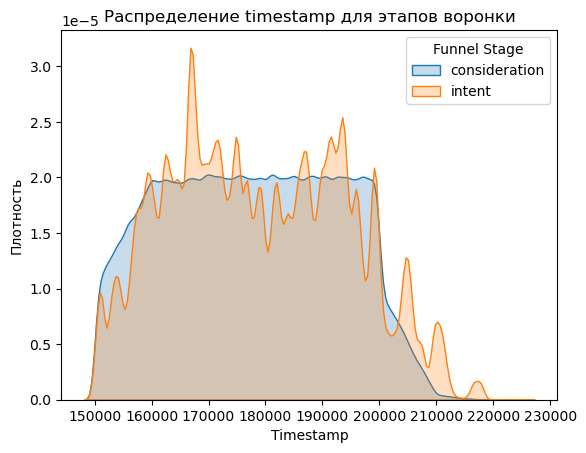

In [ ]:
# Построим KDE для каждого этапа воронки
sns.kdeplot(df[df.funnel_stage == 'consideration'].timestamp.values, label='consideration', fill=True, bw_adjust=0.5)
sns.kdeplot(df[df.funnel_stage == 'intent'].timestamp.values, label='intent', fill=True, bw_adjust=0.5)

# Настройка графика
plt.title('Распределение timestamp для этапов воронки')
plt.xlabel('Timestamp')
plt.ylabel('Плотность')
plt.legend(title='Funnel Stage')
plt.show()


Такая же ситуация у этапов consideration и intent. Больше действии выполнено в этапе intent чем в consideration, что показывает наличие сфальцифицированных данных.

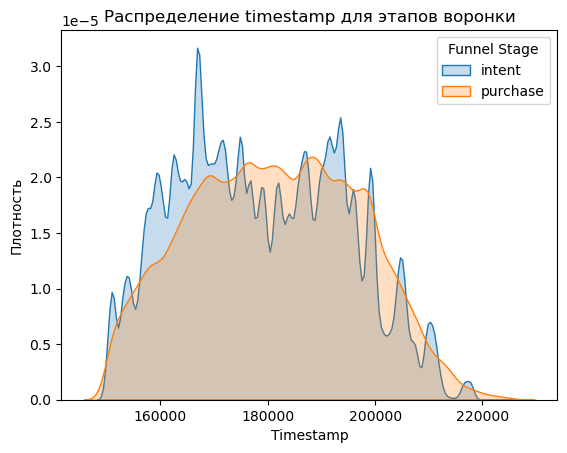

In [ ]:
sns.kdeplot(df[df.funnel_stage == 'intent'].timestamp.values, label='intent', fill=True, bw_adjust=0.5)
sns.kdeplot(df[df.funnel_stage == 'purchase'].timestamp.values, label='purchase', fill=True, bw_adjust=0.5)

# Настройка графика
plt.title('Распределение timestamp для этапов воронки')
plt.xlabel('Timestamp')
plt.ylabel('Плотность')
plt.legend(title='Funnel Stage')
plt.show()

этапы purchase и intent тоже похожи на предыдущие этапы. Больше действии выполнено в этапе purchase чем в intent, что показывает наличие сфальцифицированных данных.

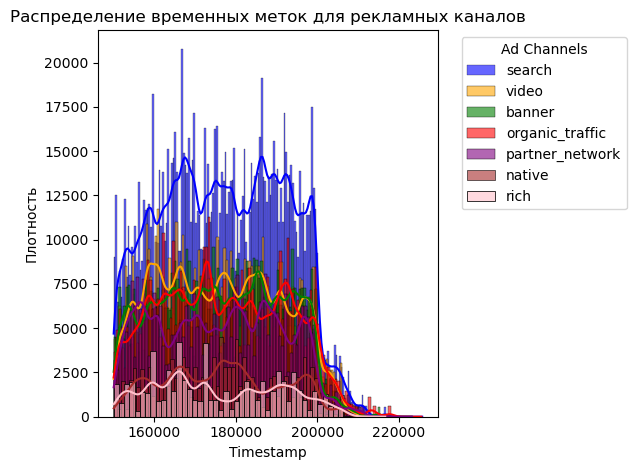

In [ ]:
# Построим гистограммы для каждого рекламного канала
sns.histplot(df[df.ad_channel == 'search'].timestamp.values, label='search', color='blue', kde=True, alpha=0.6)
sns.histplot(df[df.ad_channel == 'video'].timestamp.values, label='video', color='orange', kde=True, alpha=0.6)
sns.histplot(df[df.ad_channel == 'banner'].timestamp.values, label='banner', color='green', kde=True, alpha=0.6)
sns.histplot(df[df.ad_channel == 'organic_traffic'].timestamp.values, label='organic_traffic', color='red', kde=True, alpha=0.6)
sns.histplot(df[df.ad_channel == 'partner_network'].timestamp.values, label='partner_network', color='purple', kde=True, alpha=0.6)
sns.histplot(df[df.ad_channel == 'native'].timestamp.values, label='native', color='brown', kde=True, alpha=0.6)
sns.histplot(df[df.ad_channel == 'rich'].timestamp.values, label='rich', color='pink', kde=True, alpha=0.6)

plt.title('Распределение временных меток для рекламных каналов')
plt.xlabel('Timestamp')
plt.ylabel('Плотность')
plt.legend(title='Ad Channels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Для корректного отображения
plt.show()


по рекламным каналам можно увидеть что у каналa search очень высокие показатели, что говорит о том что больше 40тыс пользователей делали действие в одно время что маловероятно, верояно это были боты. Другие каналы не унимодальны, но они накладываются друг на друга что говорит о схожих количествах действии пользователей.

Чтобы удалить фродовые значения с датафрейма, использую user_id из датафрейма bots и создаю два датафрейма, один с фродовыми записами и один без фродовых записей.

In [ ]:
# уникальные user_id из bots
fraud_user_ids = set(bots['user_id'])

# датафрейм с фродовыми записями
fraud_df = df[df['user_id'].isin(fraud_user_ids)]

# Удаляем фродовые записи из основного датафрейма
clean_df = df[~df['user_id'].isin(fraud_user_ids)]

print("Фродовые записи:", fraud_df.shape)
print("Очищенный датафрейм:", clean_df.shape)


Фродовые записи: (2846893, 7)
Очищенный датафрейм: (976225, 7)


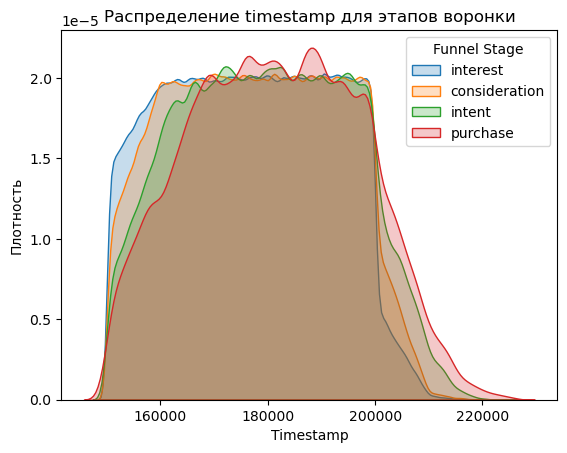

In [ ]:
sns.kdeplot(clean_df[clean_df.funnel_stage == 'interest'].timestamp.values, label='interest', fill=True, bw_adjust=0.5)
sns.kdeplot(clean_df[clean_df.funnel_stage == 'consideration'].timestamp.values, label='consideration', fill=True, bw_adjust=0.5)
sns.kdeplot(clean_df[clean_df.funnel_stage == 'intent'].timestamp.values, label='intent', fill=True, bw_adjust=0.5)
sns.kdeplot(clean_df[clean_df.funnel_stage == 'purchase'].timestamp.values, label='purchase', fill=True, bw_adjust=0.5)

plt.title('Распределение timestamp для этапов воронки')
plt.xlabel('Timestamp')
plt.ylabel('Плотность')
plt.legend(title='Funnel Stage')
plt.show()

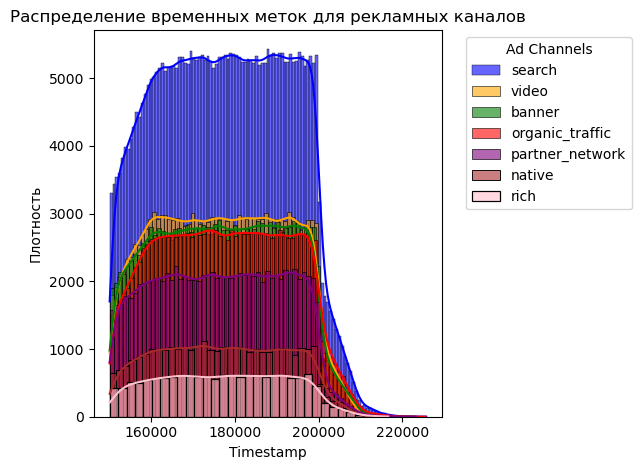

In [ ]:
# Построим гистограммы для каждого рекламного канала
sns.histplot(clean_df[clean_df.ad_channel == 'search'].timestamp.values, label='search', color='blue', kde=True, alpha=0.6)
sns.histplot(clean_df[clean_df.ad_channel == 'video'].timestamp.values, label='video', color='orange', kde=True, alpha=0.6)
sns.histplot(clean_df[clean_df.ad_channel == 'banner'].timestamp.values, label='banner', color='green', kde=True, alpha=0.6)
sns.histplot(clean_df[clean_df.ad_channel == 'organic_traffic'].timestamp.values, label='organic_traffic', color='red', kde=True, alpha=0.6)
sns.histplot(clean_df[clean_df.ad_channel == 'partner_network'].timestamp.values, label='partner_network', color='purple', kde=True, alpha=0.6)
sns.histplot(clean_df[clean_df.ad_channel == 'native'].timestamp.values, label='native', color='brown', kde=True, alpha=0.6)
sns.histplot(clean_df[clean_df.ad_channel == 'rich'].timestamp.values, label='rich', color='pink', kde=True, alpha=0.6)

plt.title('Распределение временных меток для рекламных каналов')
plt.xlabel('Timestamp')
plt.ylabel('Плотность')
plt.legend(title='Ad Channels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Для корректного отображения
plt.show()


## 4 Stage
Построить гистограмму числа действий, совершаемых пользователями в один момент времени. Вручную установить количество бинов для достоверного анализа.

In [ ]:
actions_per_timestamp = clean_df.groupby('timestamp', as_index=False).agg(users_count=('user_id', 'count'))
actions_per_timestamp

,timestamp,users_count
0,150000,16
1,150001,9
2,150002,11
3,150003,14
4,150004,10
...,...,...
60692,224682,1
60693,225430,1
60694,225482,1
60695,225495,1


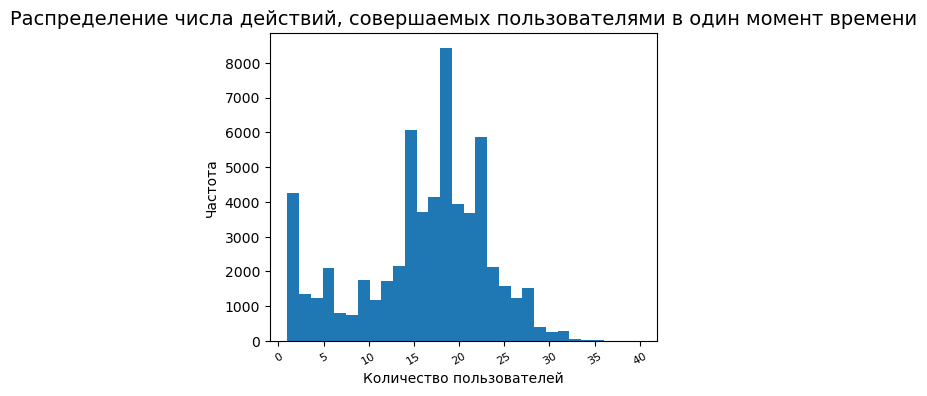

In [ ]:
plt.figure(figsize=(5,4))
plt.hist(actions_per_timestamp['users_count'], bins=30)
# Заголовок
plt.title('Распределение числа действий, совершаемых пользователями в один момент времени', fontsize=14)
# Поворачиваем подписи на оси x
plt.xticks(fontsize=8 ,rotation=30)
# Название оси X
plt.xlabel('Количество пользователей')
# Название оси Y
plt.ylabel('Частота')
plt.show()

## Stage 5

Посчитать процент фродовых пользователей от общего числа. Сохранить фродовые данные в отдельную таблицу.

In [ ]:
fraud_df.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
366,910643,interest,150028,0.0,ios,search,1.5
368,910643,interest,150029,0.0,ios,search,1.5
369,910643,interest,150029,0.0,android,search,1.5
370,910643,interest,150029,0.0,android,search,1.5
371,910643,interest,150029,0.0,android,search,1.5


In [ ]:
df.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,219687,interest,150000,0.0,android,banner,0.5
1,991236,interest,150000,0.0,android,native,2.0
2,387356,interest,150000,0.0,ios,search,1.5
3,619571,consideration,150000,0.0,ios,search,1.5
4,230119,interest,150000,0.0,ios,search,1.5


In [ ]:
fraud_users = int(fraud_df.user_id.nunique())
fraud_users

4319

In [ ]:
all_users = int(df.user_id.nunique())
all_users

529359

In [ ]:
percent_fraud_users = fraud_users/all_users * 100
percent_fraud_users

0.8158924283898074

In [ ]:
fraud_df.to_csv('fraud_data.csv', index=False)

# Correlation analysis

In [ ]:
df=pd.read_csv('notfraud_data.csv')
df.head()

In [ ]:
df.info()

## 1 Stage

Часто признаки, с которыми приходится работать, являются категориальными, и для них также требуется находить какие-то зависимости. Перекодировка значения  таблицы, относящиеся к операционной системе и этапам воронки, в бинарный и нумерованный вид в зависимости от этапа соответственно.

In [ ]:
os_binary = pd.get_dummies(df['os'], prefix='os')
os_binary

,os_android,os_ios
0,True,False
1,True,False
2,False,True
3,False,True
4,False,True
...,...,...
976220,False,True
976221,False,True
976222,True,False
976223,True,False


In [ ]:
funnel_mapping = {
    'interest': 1,
    'consideration': 2,
    'intent': 3,
    'purchase': 4
}
df['funnel_stage_numeric'] = df['funnel_stage'].map(funnel_mapping)
df.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price,funnel_stage_numeric
0,219687,interest,150000,0.0,android,banner,0.5,1
1,991236,interest,150000,0.0,android,native,2.0,1
2,387356,interest,150000,0.0,ios,search,1.5,1
3,619571,consideration,150000,0.0,ios,search,1.5,2
4,230119,interest,150000,0.0,ios,search,1.5,1


In [ ]:
df = pd.concat([df, os_binary], axis=1)
df.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price,funnel_stage_numeric,os_android,os_ios
0,219687,interest,150000,0.0,android,banner,0.5,1,True,False
1,991236,interest,150000,0.0,android,native,2.0,1,True,False
2,387356,interest,150000,0.0,ios,search,1.5,1,False,True
3,619571,consideration,150000,0.0,ios,search,1.5,2,False,True
4,230119,interest,150000,0.0,ios,search,1.5,1,False,True


## 2 Stage

Примение метода factorize из библиотеки Pandas и подсчет корреляции стандартным способом. Нарисовать матрицу с помощью библиотеки Seaborn. Посчитать корреляцию для цены и идентификатора пользователя с помощью коэффициента Пирсона.

In [ ]:
# Факторизация категориальных данных
factorized_df = df.copy()

# Применяем factorize к категориальным столбцам
factorized_df['os_encoded'], _ = pd.factorize(factorized_df['os'])
factorized_df['funnel_stage_encoded'], _ = pd.factorize(factorized_df['funnel_stage'])
factorized_df['ad_channel_encoded'], _ = pd.factorize(factorized_df['ad_channel'])

factorized_df.head()

numeric_df = factorized_df[['user_id', 'timestamp', 'profit', 'price', 'os_encoded', 'funnel_stage_encoded', 'ad_channel_encoded']]




In [ ]:
# Вычисление корреляции
correlation_matrix = numeric_df.corr()
correlation_matrix

,user_id,timestamp,profit,price,os_encoded,funnel_stage_encoded,ad_channel_encoded
user_id,1.000000,0.004892,0.023170,0.088007,0.055082,0.044852,0.039546
timestamp,0.004892,1.000000,0.014341,-0.000434,0.002105,0.054791,-0.003227
profit,0.023170,0.014341,1.000000,0.012991,0.006300,0.203903,-0.004408
price,0.088007,-0.000434,0.012991,1.000000,0.236232,0.014316,-0.131380
os_encoded,0.055082,0.002105,0.006300,0.236232,1.000000,0.013061,0.030394
funnel_stage_encoded,0.044852,0.054791,0.203903,0.014316,0.013061,1.000000,-0.016334
ad_channel_encoded,0.039546,-0.003227,-0.004408,-0.131380,0.030394,-0.016334,1.000000


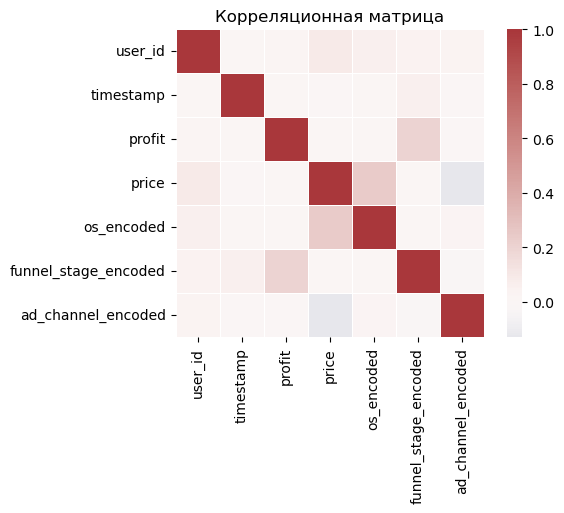

In [ ]:
# Визуализация матрицы корреляций
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, cmap="vlag", center=0, square=True, linewidths=.5)
plt.title("Корреляционная матрица")
plt.show()

In [ ]:
# Корреляция цены и идентификатора пользователя (коэффициент Пирсона)
pearson_corr_price_user = factorized_df['price'].corr(factorized_df['user_id'], method='pearson')

print(f"Коэффициент корреляции Пирсона между 'price' и 'user_id': {pearson_corr_price_user:.2f}")


Коэффициент корреляции Пирсона между 'price' и 'user_id': 0.09


In [ ]:
st.pearsonr(factorized_df['price'], factorized_df['user_id'])

PearsonRResult(statistic=0.08800678746178775, pvalue=0.0)

In [ ]:
alpha = 0.95
result = st.pearsonr(factorized_df['price'], factorized_df['user_id'])
result

PearsonRResult(statistic=0.08800678746178775, pvalue=0.0)

In [ ]:
result.confidence_interval(confidence_level=alpha)

ConfidenceInterval(low=0.08603812046049737, high=0.08997476721135103)

Значение 0.088 говорит о слабой положительной корреляции между ценой и пользователем.
Это означает, что между ними есть слабая связь: при увеличении одной переменной другая может немного увеличиваться.
Мы можем отвергнуть нулевую гипотезу об отсутствии связи между переменными.

## 3 Stage

Воспользоваться методом LabelEncoder из библиотеки Sklearn и закодировать значения рекламных каналов. Провести факторный анализ, применить метод factorize к колонкам таблицы, прежде чем проводить тест Бартлетта.

In [ ]:
!pip install factor-analyzer

In [ ]:
factorized_df['funnel_stage_encoded'], _ = pd.factorize(df['funnel_stage'])
factorized_df['os_encoded'], _ = pd.factorize(df['os'])
factorized_df['ad_channel_encoded'], _ = pd.factorize(df['ad_channel'])


# Создаем таблицу с числовыми данными
numeric_df = factorized_df[['user_id', 'timestamp', 'profit', 'price',
                         'funnel_stage_encoded', 'os_encoded', 'ad_channel_encoded']]

# Проверяем результат
numeric_df.head()

,user_id,timestamp,profit,price,funnel_stage_encoded,os_encoded,ad_channel_encoded
0,219687,150000,0.0,0.5,0,0,0
1,991236,150000,0.0,2.0,0,0,1
2,387356,150000,0.0,1.5,0,1,2
3,619571,150000,0.0,1.5,1,1,2
4,230119,150000,0.0,1.5,0,1,2


In [ ]:
chi_square_value, p_value=calculate_bartlett_sphericity(numeric_df)
chi_square_value, p_value

(135395.9657487126, 0.0)

In [ ]:
sc = StandardScaler()

In [ ]:
X_sc = sc.fit_transform(numeric_df)

In [ ]:
n_factors = 6
fa = FactorAnalyzer(n_factors=n_factors)
fa.fit(X_sc)

FactorAnalyzer(n_factors=6, rotation_kwargs={})

In [ ]:
ev, v = fa.get_eigenvalues()

<Axes: >

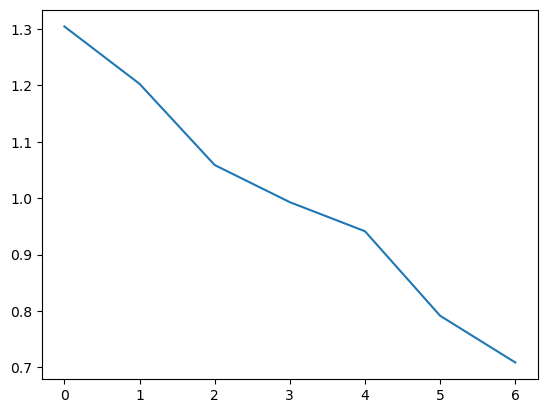

In [ ]:
sns.lineplot(data=ev)

In [ ]:
loadings = pd.DataFrame(fa.loadings_, index=numeric_df.columns, columns=['factor_{x}'.format(x=x+1) for x in range(n_factors)])

In [ ]:
loadings.sort_values(by='factor_1', ascending=False)

,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6
os_encoded,0.558270,-0.006317,0.077350,-0.054123,-0.001175,-0.027189
price,0.329358,0.010835,-0.181028,0.101352,0.258153,0.046637
funnel_stage_encoded,0.042016,0.387181,-0.092105,0.064937,-0.204930,0.039980
ad_channel_encoded,0.031487,0.005647,0.461724,0.048636,-0.002696,0.024306
timestamp,-0.005680,-0.000854,0.012450,-0.008735,0.000486,0.227597
user_id,-0.015860,-0.002886,0.036224,0.356767,0.001412,-0.012728
profit,-0.029766,0.498081,0.065247,-0.045775,0.042968,-0.022978


## 4 Stage
Выводы на основе полученных результатов.

- timestamp
  только фактор 6 показывает наибольшее значение 0.22, что может свидетельствовать о важности времени в процессе.
- price
  Фактор 1 (0.329358) и фактор 5 (0.258153) имеют положительное влияние, отрицательное влияние на фактор 3 (-0.181028), что может указывать на взаимосвязь цены и других характеристик.
- funnel_stage
  Наибольшее положительное влияние на фактор 2 (0.387181), что говорит о значимости этапов продаж в данной метрике.
- ad_channel
  наибольшее влияние наблюдается на фактор 3 (0.461724), что подчеркивает роль рекламных каналов в этом аспекте.
- user_id
  Существенное положительное влияние на фактор 4 (0.356767), что говорит о возможной индивидуальной специфике поведения пользователей.
- profit
  Наибольшее положительное влияние на фактор 2 (0.498081), что указывает на важность этого фактора для получения прибыли.
- os
  Существенное положительное влияние на фактор 1 (0.558270), что подчеркивает связь операционной системы с этим фактором.

# Data visualization

In [ ]:
df_fraud = pd.read_csv('fraud_data.csv')

In [ ]:
df_fraud.head()

In [ ]:
df_fraud.funnel_stage.value_counts()

In [ ]:
df_fraud.shape

## Visualization

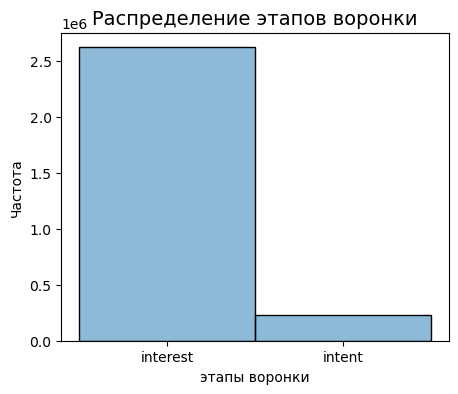

In [ ]:
# гистограмма распределения количества этапов воронки, которые были скомпрометированы
plt.figure(figsize=(5,4))
sns.histplot(data=df_fraud['funnel_stage'], bins=2, alpha = 0.5)
plt.title('Распределeние этапов воронки', fontsize=14)
plt.xlabel('этапы воронки')
plt.ylabel('Частота')
plt.show()

С графика можно увидеть что этапы воронки продаж interest, intent были скомпрометированы. На этапе interest пользователь проявляет интерес к рекламе, перешел по ссылке или кликнул по кнопке, данный этап легко скомпрометировать используя боты которые будут одновременно переходит по ссылке по заданному количеству раз. А на этапе intent, нужно заполнить поля чтобы отправить заявку, пройти регистрацию. Данные этапы состоят из заполнения полей, нажатии на кнопки поэтому они могут быть совершены ботами.

In [ ]:
# Постройте воронки продаж по всем каналам коммуникации с клиентом.
# Сделайте предварительные выводы, какой канал коммуникации кажется вам менее перспективным.
df = pd.read_csv('notfraud_data.csv')

In [ ]:
df.ad_channel.value_counts()

ad_channel
search             387540
video              158000
banner             147078
organic_traffic    141294
partner_network     95292
native              32272
rich                14749
Name: count, dtype: int64

In [ ]:
channel_counts = df.groupby(['ad_channel','funnel_stage'], as_index=False).agg(
    all_count=('user_id','count')
)

In [ ]:
channel_counts.head()

,ad_channel,funnel_stage,all_count
0,banner,consideration,47541
1,banner,intent,7566
2,banner,interest,91283
3,banner,purchase,688
4,native,consideration,12597


In [ ]:
channels_pivot = channel_counts.pivot(index='ad_channel', columns='funnel_stage', values='all_count').fillna(0)
channels_pivot

funnel_stage,consideration,intent,interest,purchase
ad_channel,,,,
banner,47541,7566,91283,688
native,12597,409,19229,37
organic_traffic,53592,9095,78065,542
partner_network,24721,4378,65743,450
rich,4657,1231,8839,22
search,134305,27243,222902,3090
video,60880,57,97058,5


In [ ]:
channels = channels_pivot.index
interest = channels_pivot.interest
consideration = channels_pivot.consideration
intent = channels_pivot.intent
purchase = channels_pivot.purchase

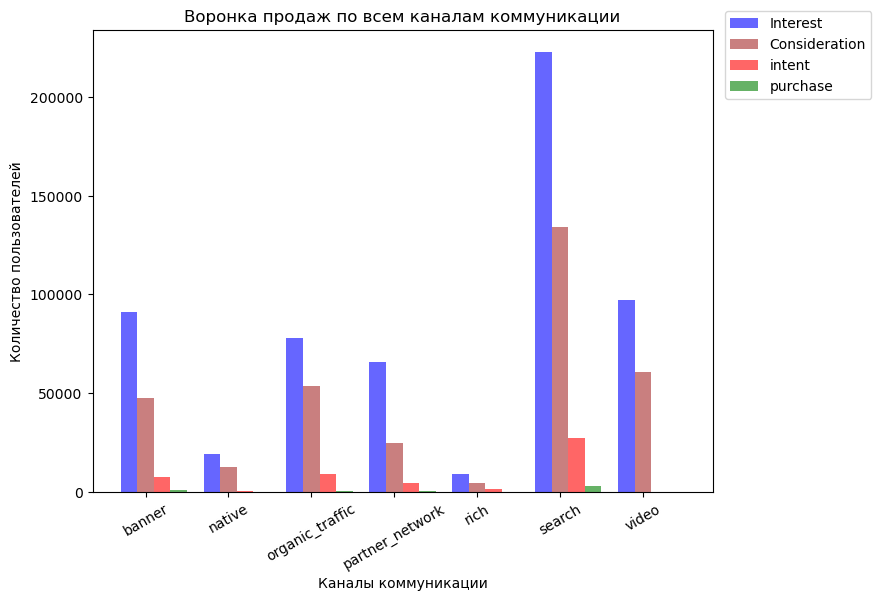

In [ ]:
bar_width = 0.2
index = np.arange(len(channels))

fig, ax = plt.subplots(figsize=(8,6))

ax.bar(index, interest, bar_width,
                color='blue', alpha=0.6,
                label='Interest')
ax.bar(index + bar_width, consideration, bar_width,
                color='brown', alpha=0.6,
                label='Consideration')
ax.bar(index + 2 * bar_width, intent, bar_width,
                color='red', alpha=0.6,
                label='intent')
ax.bar(index + 3 * bar_width, purchase, bar_width,
                color='green', alpha=0.6,
                label='purchase')

ax.set_xlabel('Каналы коммуникации')
ax.set_ylabel('Количество пользователей')
ax.set_title('Воронка продаж по всем каналам коммуникации')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(channels)
ax.tick_params(axis='x', labelrotation=30)
ax.legend(loc=(1.02, 0.85))
plt.show()

Из всех каналов коммуникации в канале rich, native самое низкое количество действии на всех этапах. Эти каналы считаются самыми не эффективными.  

In [ ]:
# Постройте графики затрат для каждого рекламного канала и прибыли по ним на последнем этапе воронки.
# Подумайте, как удачнее расположить получившиеся графики.
df.head()


,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,219687,interest,150000,0.0,android,banner,0.5
1,991236,interest,150000,0.0,android,native,2.0
2,387356,interest,150000,0.0,ios,search,1.5
3,619571,consideration,150000,0.0,ios,search,1.5
4,230119,interest,150000,0.0,ios,search,1.5


In [ ]:
df.profit.sum()

3498027.0

In [ ]:
df.price.sum()

970057.5

In [ ]:
last_stage = df[df['funnel_stage']=='purchase']
last_stage.shape

(4834, 7)

In [ ]:
channel_profit = last_stage.groupby('ad_channel', as_index=False).agg(
    profit=('profit','sum'),
    price=('price', 'sum')
)
channel_profit

,ad_channel,profit,price
0,banner,497881.0,344.00
1,native,37355.0,74.00
2,organic_traffic,367094.0,0.00
3,partner_network,445411.0,450.00
4,rich,33511.0,55.00
5,search,2112193.0,4635.00
6,video,4582.0,3.75


In [ ]:
channels = channel_profit.index
price = channel_profit.price
profit = channel_profit.profit

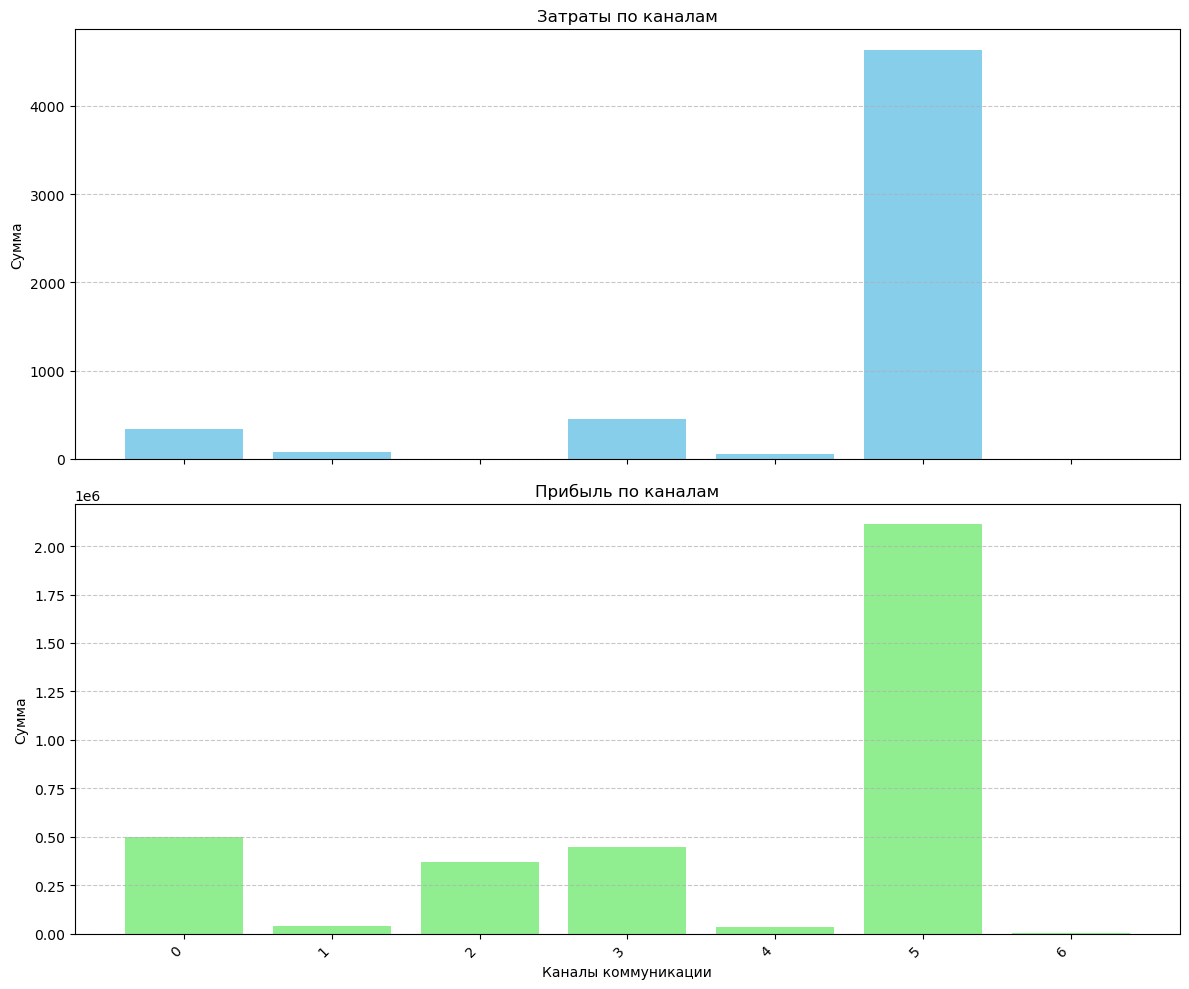

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

ax[0].bar(channels, price, color='skyblue')
ax[0].set_title('Затраты по каналам')
ax[0].set_ylabel('Сумма')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

ax[1].bar(channels, profit, color='lightgreen')
ax[1].set_title('Прибыль по каналам')
ax[1].set_ylabel('Сумма')
ax[1].set_xlabel('Каналы коммуникации')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Постройте график распределения операционной системы пользователя для каждого канала коммуникации.
os_type = df.groupby('os')['user_id'].count()
os_type.head()

os
android    513657
ios        462568
Name: user_id, dtype: int64

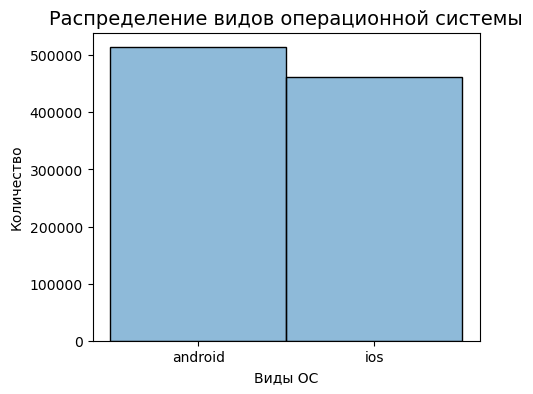

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(data=df.os, bins=2, alpha = 0.5)
plt.title('Распределeние видов операционной системы', fontsize=14)
plt.xlabel('Виды ОС')
plt.ylabel('Количество')
plt.show()

График показывает что пользователи системы андроид чаще использовались в нашей рекламной кампании.

# Hypothesis

После проведённого ранее анализа, проверяю гипотезы.


Задачи:  

1. Разделить данные на две группы:  
     - Органический трафик (прямые переходы на сайт и поисковые переходы, за которые рекламодатель не платит).  
     - Рекламный трафик (все остальные рекламные каналы).  

2. Сравнить доли пользователей на каждом этапе воронки продаж между двумя группами (органический и рекламный трафик). Оценить статистическую значимость различий, применяя соответствующие статистические критерии (например, критерий долей).  

3. Рассчитать конверсионные воронки для каждого рекламного канала. Определить лучшие и худшие рекламные каналы по удержанию пользователей на этапах consideration, intent и purchase.  

4. Обосновать, какой из наименее эффективных рекламных каналов следует отключить. Формулировать гипотезы, полагаясь на результаты анализа, полученные в предыдущих блоках.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest


In [ ]:
df = pd.read_csv('notfraud_data.csv')
df.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,219687,interest,150000,0.0,android,banner,0.5
1,991236,interest,150000,0.0,android,native,2.0
2,387356,interest,150000,0.0,ios,search,1.5
3,619571,consideration,150000,0.0,ios,search,1.5
4,230119,interest,150000,0.0,ios,search,1.5


In [ ]:
df.shape

(976225, 7)

In [ ]:
df.ad_channel.value_counts()

ad_channel
search             387540
video              158000
banner             147078
organic_traffic    141294
partner_network     95292
native              32272
rich                14749
Name: count, dtype: int64

In [ ]:
org_tr = df[df['ad_channel']=='organic_traffic']
org_tr

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
7,897013,interest,150000,0.0,android,organic_traffic,0.0
8,242700,interest,150000,0.0,android,organic_traffic,0.0
9,143856,interest,150000,0.0,android,organic_traffic,0.0
10,26717,consideration,150000,0.0,android,organic_traffic,0.0
18,286799,interest,150001,0.0,android,organic_traffic,0.0
...,...,...,...,...,...,...,...
976209,750226,purchase,222773,260.0,android,organic_traffic,0.0
976215,104960,purchase,223361,520.0,ios,organic_traffic,0.0
976217,706604,intent,223417,0.0,ios,organic_traffic,0.0
976222,947521,consideration,225482,0.0,android,organic_traffic,0.0


In [ ]:
adv_tr = df[df['ad_channel']!='organic_traffic']
adv_tr.ad_channel.value_counts()

ad_channel
search             387540
video              158000
banner             147078
partner_network     95292
native              32272
rich                14749
Name: count, dtype: int64

In [ ]:
adv_tr

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,219687,interest,150000,0.0,android,banner,0.5
1,991236,interest,150000,0.0,android,native,2.0
2,387356,interest,150000,0.0,ios,search,1.5
3,619571,consideration,150000,0.0,ios,search,1.5
4,230119,interest,150000,0.0,ios,search,1.5
...,...,...,...,...,...,...,...
976218,501946,intent,224125,0.0,android,search,1.5
976219,749577,purchase,224647,2136.0,ios,search,1.5
976220,929180,intent,224682,0.0,ios,search,1.5
976221,1034498,intent,225430,0.0,ios,search,1.5


In [ ]:
# Доли пользователей на этапах
df.size
org_results=[]
for stage in org_tr.funnel_stage.unique():
    result = org_tr[org_tr['funnel_stage']==stage].shape[0] / (org_tr[org_tr['funnel_stage']==stage] + adv_tr[adv_tr['funnel_stage']==stage]).shape[0]
    org_results.append(stage)
    org_results.append(result)
print(f'Organic ratio:', org_results)

Organic ratio: ['interest', 0.1338749037503494, 'consideration', 0.1584188854040728, 'intent', 0.18197643010064227, 'purchase', 0.112122465866777]


In [ ]:
adv_results=[]
for stage in adv_tr.funnel_stage.unique():
    result = adv_tr[adv_tr['funnel_stage']==stage].shape[0] / (org_tr[org_tr['funnel_stage']==stage] + adv_tr[adv_tr['funnel_stage']==stage]).shape[0]
    adv_results.append(stage)
    adv_results.append(result)
print(f'Advertisement ratio:', adv_results)



Advertisement ratio: ['interest', 0.8661250962496506, 'consideration', 0.8415811145959272, 'intent', 0.8180235698993578, 'purchase', 0.887877534133223]


In [ ]:
# total
total = df.shape[0]
total_interest = df[df.funnel_stage =='interest']
total_cons = df[df.funnel_stage =='consideration']
total_intent = df[df.funnel_stage =='intent']
total_purchase = df[df.funnel_stage =='purchase']

In [ ]:
org_interest = org_tr[org_tr.funnel_stage =='interest']
org_cons = org_tr[org_tr.funnel_stage =='consideration']
org_intent = org_tr[org_tr.funnel_stage =='intent']
org_purc = org_tr[org_tr.funnel_stage =='purchase']

In [ ]:
adv_interest = adv_tr[adv_tr.funnel_stage =='interest']
adv_cons = adv_tr[adv_tr.funnel_stage =='consideration']
adv_intent = adv_tr[adv_tr.funnel_stage =='intent']
adv_purc = adv_tr[adv_tr.funnel_stage =='purchase']

In [ ]:
# Список этапов воронки
stages = ['interest', 'consideration', 'intent', 'purchase']

# Количество пользователей для органического и рекламного трафика
org_counts = [
    org_interest.shape[0],
    org_cons.shape[0],
    org_intent.shape[0],
    org_purc.shape[0]
]

adv_counts = [
    adv_interest.shape[0],
    adv_cons.shape[0],
    adv_intent.shape[0],
    adv_purc.shape[0]
]

# Общее количество пользователей на каждом этапе
total_counts = [
    total_interest.shape[0],
    total_cons.shape[0],
    total_intent.shape[0],
    total_purchase.shape[0]
]

# Z-тест для каждого этапа
print("Результаты Z-теста для пропорций:\n")
for i, stage in enumerate(stages):
    # Успехи (количество пользователей на этапе для каждой группы)
    successes = [org_counts[i], adv_counts[i]]
    # Общее число наблюдений (всего пользователей на этапе)
    totals = [total_counts[i], total_counts[i]]

    # Проведение Z-теста
    z_stat, p_value = proportions_ztest(successes, totals)

    print(f"Этап: {stage}")
    print(f"Z-статистика: {z_stat:.3f}, p-value: {p_value:.3f}")
    if p_value < 0.05:
        print("Различия статистически значимы.\n")
    else:
        print("Различия статистически незначимы.\n")


Результаты Z-теста для пропорций:

Этап: interest
Z-статистика: -790.775, p-value: 0.000
Различия статистически значимы.

Этап: consideration
Z-статистика: -561.934, p-value: 0.000
Различия статистически значимы.

Этап: intent
Z-статистика: -201.094, p-value: 0.000
Различия статистически значимы.

Этап: purchase
Z-статистика: -76.277, p-value: 0.000
Различия статистически значимы.



In [ ]:
for i, stage in enumerate(stages):
    # Успехи и наблюдения для каждой группы
    successes = [org_counts[i], adv_counts[i]]
    totals = [org_counts[i] + adv_counts[i], org_counts[i] + adv_counts[i]]  # Суммируем для каждой группы

    # Z-тест
    z_stat, p_value = proportions_ztest(successes, totals)
    print(f"Этап: {stage}")
    print(f"Z-статистика: {z_stat:.3f}, p-value: {p_value:.3f}")


Этап: interest
Z-статистика: -790.775, p-value: 0.000
Этап: consideration
Z-статистика: -561.934, p-value: 0.000
Этап: intent
Z-статистика: -201.094, p-value: 0.000
Этап: purchase
Z-статистика: -76.277, p-value: 0.000


In [ ]:
stages = ['consideration', 'intent', 'purchase']
df_cip = df[df.funnel_stage.isin(stages)]
df_cip.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
3,619571,consideration,150000,0.0,ios,search,1.50
6,793204,consideration,150000,0.0,android,video,0.75
10,26717,consideration,150000,0.0,android,organic_traffic,0.00
11,111649,consideration,150000,0.0,android,video,0.75
20,869353,consideration,150001,0.0,ios,search,1.50


In [ ]:
channel_counts = df_cip.groupby(['ad_channel','funnel_stage'], as_index=False).agg(
    all_count=('user_id','count')
)
channel_counts

,ad_channel,funnel_stage,all_count
0,banner,consideration,47541
1,banner,intent,7566
2,banner,purchase,688
3,native,consideration,12597
4,native,intent,409
5,native,purchase,37
6,organic_traffic,consideration,53592
7,organic_traffic,intent,9095
8,organic_traffic,purchase,542
9,partner_network,consideration,24721


In [ ]:
channels_pivot = channel_counts.pivot(index='ad_channel', columns='funnel_stage', values='all_count').fillna(0)

channels = channels_pivot.index
cons = channels_pivot.consideration
intent = channels_pivot.intent
purch = channels_pivot.purchase
channels_pivot['CR_intent']= channels_pivot['purchase']/channels_pivot['intent']
channels_pivot['CR_consideration']= channels_pivot['purchase']/channels_pivot['consideration']

channels_pivot

funnel_stage,consideration,intent,purchase,CR_intent,CR_consideration
ad_channel,,,,,
banner,47541,7566,688,0.090933,0.014472
native,12597,409,37,0.090465,0.002937
organic_traffic,53592,9095,542,0.059593,0.010113
partner_network,24721,4378,450,0.102787,0.018203
rich,4657,1231,22,0.017872,0.004724
search,134305,27243,3090,0.113424,0.023007
video,60880,57,5,0.087719,0.000082


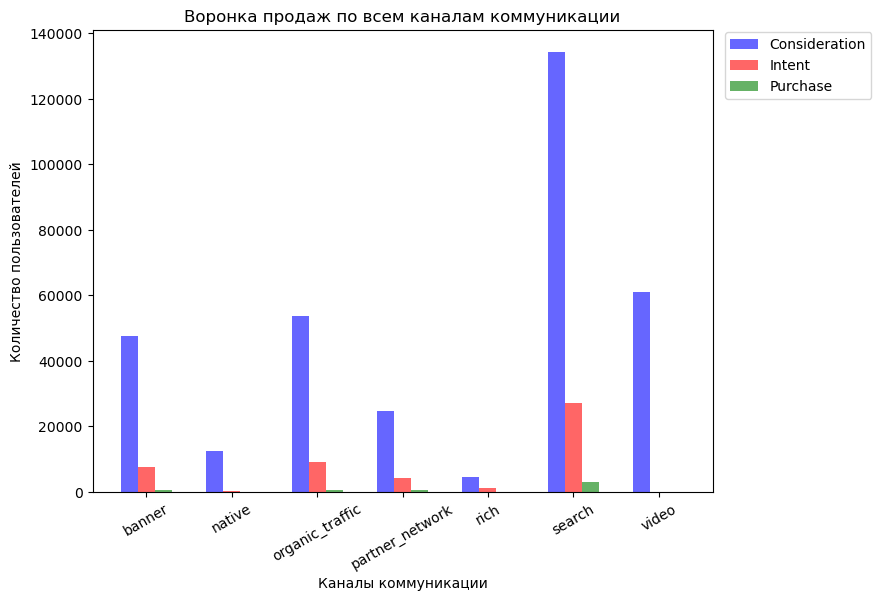

In [ ]:
bar_width = 0.2
index = np.arange(len(channels))

fig, ax = plt.subplots(figsize=(8,6))

# Нарисовать столбцы
ax.bar(index, cons, bar_width,
                color='blue', alpha=0.6,
                label='Consideration')
ax.bar(index + bar_width, intent, bar_width,
                color='red', alpha=0.6,
                label='Intent')
ax.bar(index + 2 * bar_width, purch, bar_width,
                color='green', alpha=0.6,
                label='Purchase')

ax.set_xlabel('Каналы коммуникации')
ax.set_ylabel('Количество пользователей')
ax.set_title('Воронка продаж по всем каналам коммуникации')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(channels)
ax.tick_params(axis='x', labelrotation=30)
ax.legend(loc=(1.02, 0.85))
plt.show()

При сравнении долей органического и рекламного трафика, можно заметить что доля рекламного трафика больше чем у органического трафика. Также в результате графика этапов воронки consideration, intent, purchase самые низкие показатели у кампании rich, native. Также у этих кампании были много скомпрометированных данных. Также у канала video низкая конверсия с этапа consideration на purchase.
Для увеличения продаж можно воспользоваться отключить каналы откуда идет низкий трафик и конверсия.